In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [7]:
def preprocess_k_means(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    twoDImage = img.reshape((-1,3))
    return np.float32(twoDImage)

In [8]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts=10

def k_means_segmentation(img):
    ret,label,center=cv2.kmeans(img,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    return center[label.flatten()].reshape((img.shape))

In [9]:
paths = ["./images/1999_base_first_edition_4_10.webp", "./images/2016_japan_promo_282.jpeg"]

[array([[196, 192, 177],
        [196, 192, 177],
        [196, 192, 177],
        ...,
        [196, 192, 177],
        [196, 192, 177],
        [196, 192, 177]], dtype=uint8)]

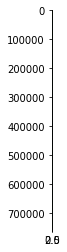

In [10]:
def k_means_process_images(paths, debug = False):
    result = []
    for path in paths:
        base_img = cv2.imread(path)
        processed_img = preprocess_k_means(base_img)
        img_segmented = k_means_segmentation(processed_img)
        result.append(img_segmented)
        if debug:
            plt.imshow(processed_img)
    return result

k_means_process_images([paths[1]], True)

In [11]:
def contour_preprocess(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    _,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)
    return cv2.dilate(cv2.Canny(thresh, 0, 255), None)

In [12]:
def detect_contours(edges):
    cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
    mask = np.zeros((256,256), np.uint8)
    return cv2.drawContours(mask, [cnt],-1, 255, -1)

In [13]:
def segment_regions(img, mask):
    dst = cv2.bitwise_and(img, img, mask=mask)
    return cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

In [14]:
def contour_process_images(paths, debug = False):
    result = []
    for path in paths:
        base_img = cv2.imread(path)
        edges = contour_preprocess(base_img)
        mask = detect_contours(edges)
        img_segmented = segment_regions(base_img, mask)
        result.append(img_segmented)
        if debug:
            plt.imshow(img_segmented)
    return result

contour_process_images([paths[0]], True)

error: OpenCV(4.5.5) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/core/src/arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'
